In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

sns.set()

from sklearn.preprocessing import StandardScaler, RobustScaler

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [90]:
df = pd.read_csv('C:\\Users\\Muhammad Hazim\\Desktop\\credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [91]:
df.drop(['Loan ID','Customer ID'], axis = 1, inplace = True)

In [92]:
list1 = []
for column in df.columns.values:
    if df[column].isnull().any() == True:
        list1.append(column)

list2 = []
for column in list1:
    list2.append(df[column].isnull().sum())
    
table1 = pd.DataFrame()
table1['Column with missing values'] = list1
table1['Total'] = list2
table1['Percentage'] = np.true_divide(list2, df.shape[0])
table1 = table1.sort_values(by = 'Percentage', ascending = False).reset_index(drop = True)

In [93]:
table1

,Column with missing values,Total,Percentage
0,Months since last delinquent,53655,0.533806
1,Credit Score,19668,0.195674
2,Annual Income,19668,0.195674
3,Years in current job,4736,0.047118
4,Bankruptcies,718,0.007143
5,Tax Liens,524,0.005213
6,Maximum Open Credit,516,0.005134
7,Current Credit Balance,514,0.005114
8,Number of Credit Problems,514,0.005114
9,Number of Open Accounts,514,0.005114


In [94]:
df.shape

(100514, 17)

In [95]:
df.drop('Months since last delinquent', axis = 1, inplace = True)

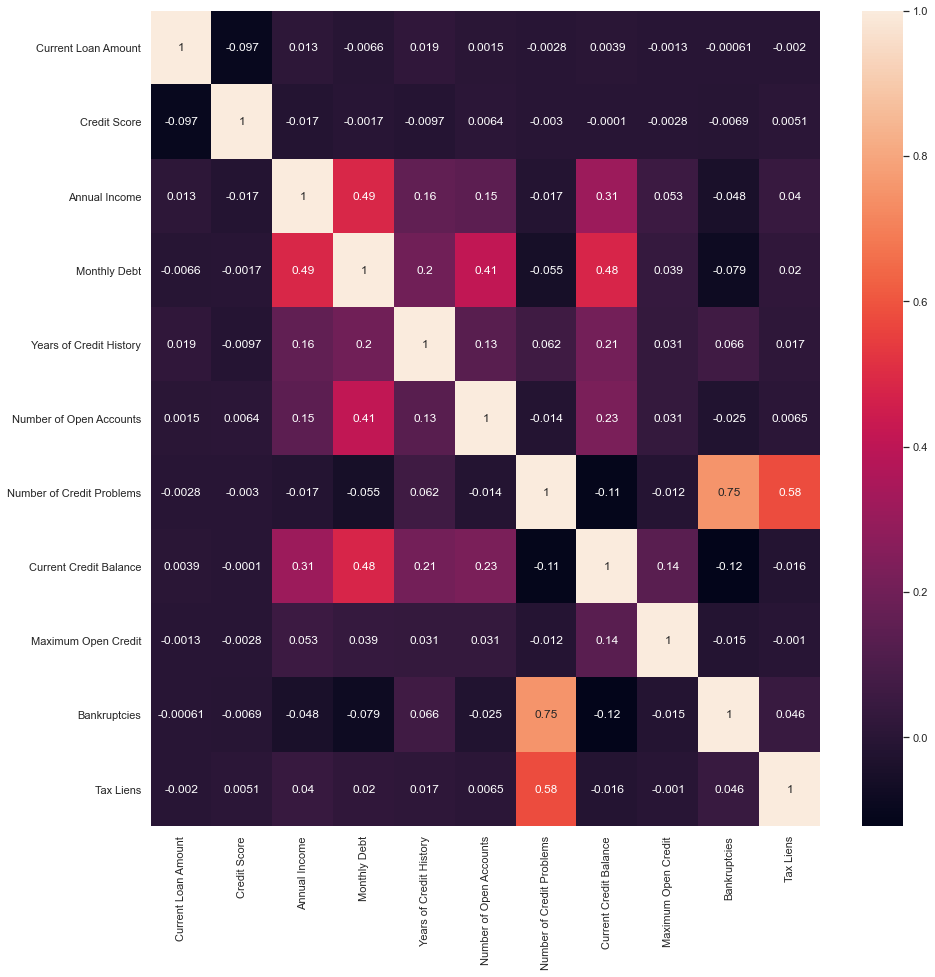

In [96]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(), annot = True)

In [97]:
df = df.dropna()

In [98]:
list1 = []
for column in df.columns.values:
    if df[column].isnull().any() == True:
        list1.append(column)

list2 = []
for column in list1:
    list2.append(df[column].isnull().sum())
    
table1 = pd.DataFrame()
table1['Column with missing values'] = list1
table1['Total'] = list2
table1['Percentage'] = np.true_divide(list2, df.shape[0])
table1 = table1.sort_values(by = 'Percentage', ascending = False).reset_index(drop = True)

In [99]:
df['Loan Status'].value_counts()

Fully Paid     61057
Charged Off    16214
Name: Loan Status, dtype: int64

In [100]:
cat_feat = []

for column in df.columns.values:
    if (column != 'Loan Status') & (df[column].dtypes == 'O'):
        cat_feat.append(column)   
        
numd_feat = []

for column in df.columns.values:
    if (column != 'Loan Status') & (df[column].dtypes == 'int64'):
        numd_feat.append(column) 

numf_feat = []

for column in df.columns.values:
    if (column != 'Loan Status') & (df[column].dtypes == 'float64'):
        numf_feat.append(column)

In [101]:
def plot_bar(column):
    table = pd.DataFrame()
    table['Charged off'] = df[df['Loan Status'] == 'Charged Off'][column].value_counts()
    table['Fully Paid'] = df[df['Loan Status'] == 'Fully Paid'][column].value_counts()
    table.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

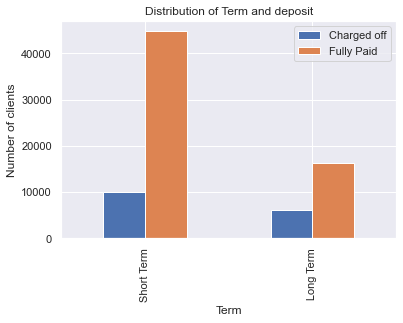

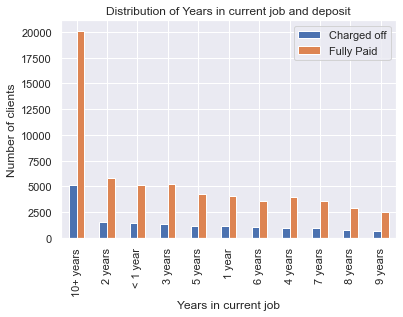

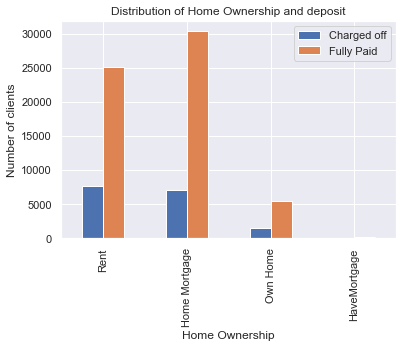

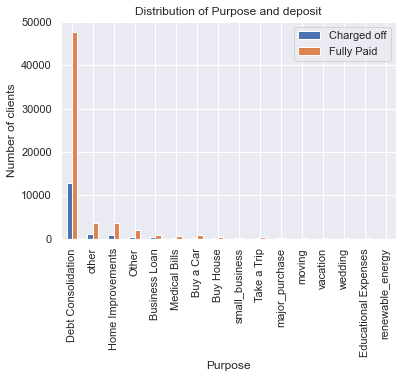

In [102]:
for column in cat_feat:
    plot_bar(column)

In [103]:
numd_feat

[]

In [104]:
numf_feat

['Current Loan Amount',
 'Credit Score',
 'Annual Income',
 'Monthly Debt',
 'Years of Credit History',
 'Number of Open Accounts',
 'Number of Credit Problems',
 'Current Credit Balance',
 'Maximum Open Credit',
 'Bankruptcies',
 'Tax Liens']

(10000.0, 1000000.0)

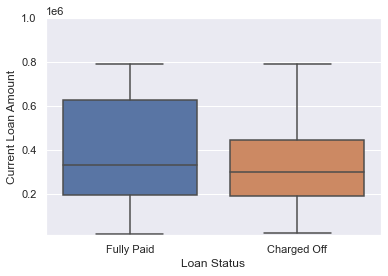

In [105]:
sns.boxplot(df['Loan Status'],df['Current Loan Amount'])
plt.ylim(10000,1000000)

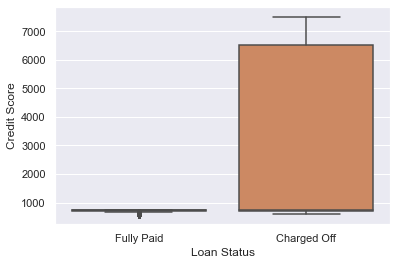

In [106]:
sns.boxplot(df['Loan Status'],df['Credit Score'])

(70000.0, 5000000.0)

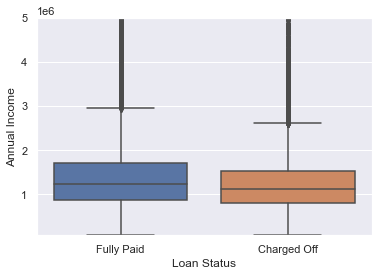

In [107]:
sns.boxplot(df['Loan Status'],df['Annual Income'])
plt.ylim(70000,5000000)

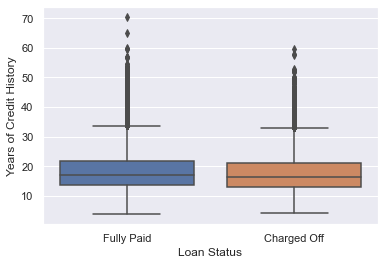

In [108]:
sns.boxplot(df['Loan Status'],df['Years of Credit History'])

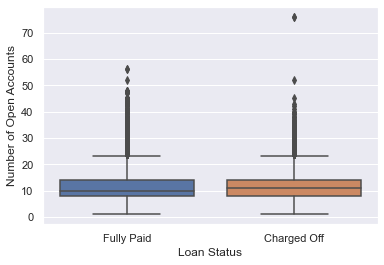

In [109]:
sns.boxplot(df['Loan Status'],df['Number of Open Accounts'])

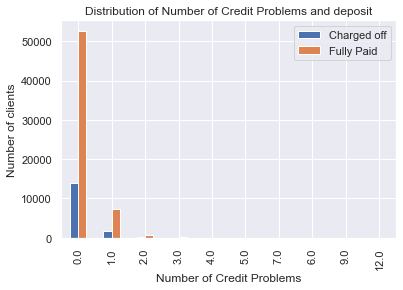

In [110]:
plot_bar('Number of Credit Problems')

(0.0, 1000000.0)

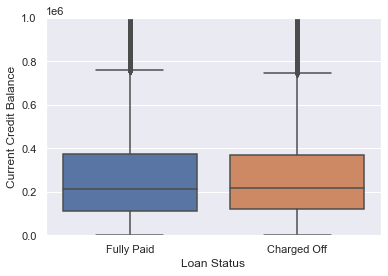

In [111]:
sns.boxplot(df['Loan Status'],df['Current Credit Balance'])
plt.ylim(0,1000000)

(0.0, 2000000.0)

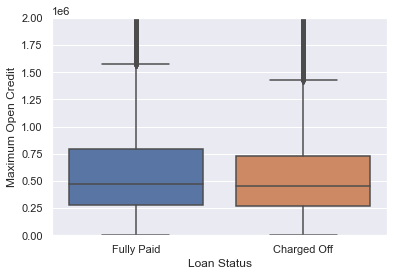

In [112]:
sns.boxplot(df['Loan Status'],df['Maximum Open Credit'])
plt.ylim(0,2000000)

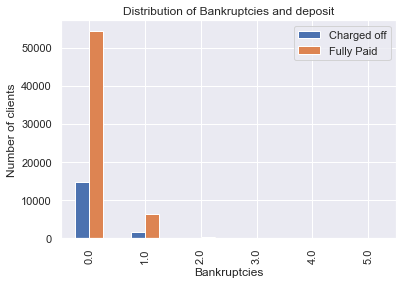

In [113]:
plot_bar('Bankruptcies')

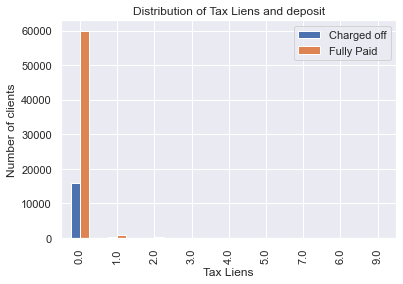

In [114]:
plot_bar('Tax Liens')

In [115]:
std_scaler = StandardScaler()

In [116]:
df[numf_feat] = std_scaler.fit_transform(df[numf_feat])

In [117]:
df['Loan Status'] = df['Loan Status'].map({'Charged Off':1, 'Fully Paid':0})

In [118]:
df = pd.get_dummies(df, drop_first = True)

In [120]:
x = df.drop("Loan Status", axis=1)
y = df["Loan Status"]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [122]:
def score(model):
    df1 = pd.DataFrame(index = ['Accuracy', 'Precision', 'ROC AUC'] )
    df1['Train Score'] = [accuracy_score(y_train, model.predict(x_train)), precision_score(y_train, model.predict(x_train)), roc_auc_score(y_train, model.predict_proba(x_train)[:,1])]
    df1['Test Score'] = [accuracy_score(y_test, model.predict(x_test)), precision_score(y_test, model.predict(x_test)), roc_auc_score(y_test, model.predict_proba(x_test)[:,1])]        
    return df1

In [156]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [157]:
score(lr)

,Train Score,Test Score
Accuracy,0.845784,0.845357
Precision,0.998550,1.000000
ROC AUC,0.763097,0.760879


In [135]:
dt = DecisionTreeClassifier(max_depth = 6)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [136]:
score(dt)

,Train Score,Test Score
Accuracy,0.845833,0.845357
Precision,1.000000,1.000000
ROC AUC,0.765507,0.762411


In [143]:
rf = RandomForestClassifier(max_depth=8)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8)

In [144]:
score(rf)

,Train Score,Test Score
Accuracy,0.845833,0.845357
Precision,1.000000,1.000000
ROC AUC,0.795850,0.772443


In [149]:
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 10)
mlp.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=10, max_iter=100)

In [150]:
score(mlp)

,Train Score,Test Score
Accuracy,0.845995,0.845163
Precision,0.989504,0.986270
ROC AUC,0.778711,0.767173


In [151]:
cb = CatBoostClassifier(learning_rate = 0.05)
cb.fit(x_train, y_train)

0:	learn: 0.6468865	total: 639ms	remaining: 10m 38s
1:	learn: 0.6073827	total: 690ms	remaining: 5m 44s
2:	learn: 0.5820211	total: 735ms	remaining: 4m 4s
3:	learn: 0.5606251	total: 790ms	remaining: 3m 16s
4:	learn: 0.5422819	total: 871ms	remaining: 2m 53s
5:	learn: 0.5266786	total: 946ms	remaining: 2m 36s
6:	learn: 0.5127787	total: 1.01s	remaining: 2m 23s
7:	learn: 0.5006248	total: 1.08s	remaining: 2m 13s
8:	learn: 0.4866675	total: 1.15s	remaining: 2m 6s
9:	learn: 0.4776982	total: 1.21s	remaining: 1m 59s
10:	learn: 0.4698846	total: 1.28s	remaining: 1m 54s
11:	learn: 0.4624979	total: 1.35s	remaining: 1m 51s
12:	learn: 0.4557900	total: 1.42s	remaining: 1m 48s
13:	learn: 0.4478055	total: 1.49s	remaining: 1m 45s
14:	learn: 0.4428545	total: 1.56s	remaining: 1m 42s
15:	learn: 0.4377800	total: 1.62s	remaining: 1m 39s
16:	learn: 0.4339417	total: 1.67s	remaining: 1m 36s
17:	learn: 0.4291349	total: 1.74s	remaining: 1m 35s
18:	learn: 0.4252576	total: 1.81s	remaining: 1m 33s
19:	learn: 0.4225580	to

160:	learn: 0.3728782	total: 11.3s	remaining: 59.1s
161:	learn: 0.3728400	total: 11.4s	remaining: 58.9s
162:	learn: 0.3728029	total: 11.5s	remaining: 58.9s
163:	learn: 0.3727393	total: 11.6s	remaining: 58.9s
164:	learn: 0.3727030	total: 11.6s	remaining: 58.9s
165:	learn: 0.3726540	total: 11.7s	remaining: 58.8s
166:	learn: 0.3725641	total: 11.8s	remaining: 58.8s
167:	learn: 0.3725297	total: 11.8s	remaining: 58.7s
168:	learn: 0.3724625	total: 11.9s	remaining: 58.6s
169:	learn: 0.3724125	total: 12s	remaining: 58.5s
170:	learn: 0.3723561	total: 12.1s	remaining: 58.5s
171:	learn: 0.3722448	total: 12.1s	remaining: 58.4s
172:	learn: 0.3722081	total: 12.2s	remaining: 58.3s
173:	learn: 0.3721478	total: 12.3s	remaining: 58.3s
174:	learn: 0.3721268	total: 12.3s	remaining: 58.1s
175:	learn: 0.3720842	total: 12.4s	remaining: 58s
176:	learn: 0.3720360	total: 12.4s	remaining: 57.8s
177:	learn: 0.3719805	total: 12.5s	remaining: 57.6s
178:	learn: 0.3719436	total: 12.5s	remaining: 57.4s
179:	learn: 0.37

320:	learn: 0.3632097	total: 20.3s	remaining: 43s
321:	learn: 0.3631497	total: 20.4s	remaining: 42.9s
322:	learn: 0.3630002	total: 20.4s	remaining: 42.9s
323:	learn: 0.3629529	total: 20.5s	remaining: 42.8s
324:	learn: 0.3628910	total: 20.6s	remaining: 42.7s
325:	learn: 0.3628462	total: 20.6s	remaining: 42.6s
326:	learn: 0.3627960	total: 20.7s	remaining: 42.6s
327:	learn: 0.3627271	total: 20.7s	remaining: 42.5s
328:	learn: 0.3626411	total: 20.8s	remaining: 42.4s
329:	learn: 0.3625764	total: 20.9s	remaining: 42.3s
330:	learn: 0.3625107	total: 20.9s	remaining: 42.3s
331:	learn: 0.3624488	total: 21s	remaining: 42.2s
332:	learn: 0.3623725	total: 21s	remaining: 42.1s
333:	learn: 0.3623080	total: 21.1s	remaining: 42s
334:	learn: 0.3622542	total: 21.1s	remaining: 41.9s
335:	learn: 0.3621857	total: 21.2s	remaining: 41.8s
336:	learn: 0.3621003	total: 21.2s	remaining: 41.8s
337:	learn: 0.3620416	total: 21.3s	remaining: 41.7s
338:	learn: 0.3619935	total: 21.3s	remaining: 41.6s
339:	learn: 0.361940

481:	learn: 0.3541038	total: 28.6s	remaining: 30.7s
482:	learn: 0.3540689	total: 28.7s	remaining: 30.7s
483:	learn: 0.3540083	total: 28.7s	remaining: 30.6s
484:	learn: 0.3539659	total: 28.8s	remaining: 30.5s
485:	learn: 0.3539213	total: 28.8s	remaining: 30.5s
486:	learn: 0.3538864	total: 28.9s	remaining: 30.4s
487:	learn: 0.3538409	total: 28.9s	remaining: 30.3s
488:	learn: 0.3537894	total: 28.9s	remaining: 30.3s
489:	learn: 0.3537201	total: 29s	remaining: 30.2s
490:	learn: 0.3536714	total: 29s	remaining: 30.1s
491:	learn: 0.3536277	total: 29.1s	remaining: 30s
492:	learn: 0.3535675	total: 29.1s	remaining: 30s
493:	learn: 0.3535308	total: 29.2s	remaining: 29.9s
494:	learn: 0.3534866	total: 29.2s	remaining: 29.8s
495:	learn: 0.3534279	total: 29.3s	remaining: 29.7s
496:	learn: 0.3533663	total: 29.3s	remaining: 29.7s
497:	learn: 0.3533225	total: 29.4s	remaining: 29.6s
498:	learn: 0.3532729	total: 29.4s	remaining: 29.5s
499:	learn: 0.3532464	total: 29.5s	remaining: 29.5s
500:	learn: 0.353219

641:	learn: 0.3463564	total: 38.7s	remaining: 21.6s
642:	learn: 0.3462991	total: 38.7s	remaining: 21.5s
643:	learn: 0.3462663	total: 38.8s	remaining: 21.4s
644:	learn: 0.3462244	total: 38.8s	remaining: 21.4s
645:	learn: 0.3461862	total: 38.9s	remaining: 21.3s
646:	learn: 0.3461517	total: 38.9s	remaining: 21.2s
647:	learn: 0.3461133	total: 39s	remaining: 21.2s
648:	learn: 0.3460680	total: 39s	remaining: 21.1s
649:	learn: 0.3459963	total: 39.1s	remaining: 21s
650:	learn: 0.3459428	total: 39.1s	remaining: 21s
651:	learn: 0.3458849	total: 39.2s	remaining: 20.9s
652:	learn: 0.3458536	total: 39.2s	remaining: 20.8s
653:	learn: 0.3458217	total: 39.3s	remaining: 20.8s
654:	learn: 0.3457835	total: 39.3s	remaining: 20.7s
655:	learn: 0.3457400	total: 39.3s	remaining: 20.6s
656:	learn: 0.3457064	total: 39.4s	remaining: 20.6s
657:	learn: 0.3456721	total: 39.4s	remaining: 20.5s
658:	learn: 0.3456384	total: 39.5s	remaining: 20.4s
659:	learn: 0.3456029	total: 39.5s	remaining: 20.4s
660:	learn: 0.345539

801:	learn: 0.3391918	total: 47s	remaining: 11.6s
802:	learn: 0.3391574	total: 47.1s	remaining: 11.6s
803:	learn: 0.3391176	total: 47.2s	remaining: 11.5s
804:	learn: 0.3390595	total: 47.2s	remaining: 11.4s
805:	learn: 0.3390125	total: 47.3s	remaining: 11.4s
806:	learn: 0.3389727	total: 47.4s	remaining: 11.3s
807:	learn: 0.3389432	total: 47.4s	remaining: 11.3s
808:	learn: 0.3389113	total: 47.5s	remaining: 11.2s
809:	learn: 0.3388722	total: 47.6s	remaining: 11.2s
810:	learn: 0.3388369	total: 47.7s	remaining: 11.1s
811:	learn: 0.3387735	total: 47.7s	remaining: 11s
812:	learn: 0.3387583	total: 47.8s	remaining: 11s
813:	learn: 0.3387033	total: 47.9s	remaining: 10.9s
814:	learn: 0.3386334	total: 47.9s	remaining: 10.9s
815:	learn: 0.3385721	total: 48s	remaining: 10.8s
816:	learn: 0.3385424	total: 48.1s	remaining: 10.8s
817:	learn: 0.3384953	total: 48.1s	remaining: 10.7s
818:	learn: 0.3384519	total: 48.2s	remaining: 10.6s
819:	learn: 0.3384308	total: 48.2s	remaining: 10.6s
820:	learn: 0.338400

962:	learn: 0.3327422	total: 57.3s	remaining: 2.2s
963:	learn: 0.3327031	total: 57.4s	remaining: 2.14s
964:	learn: 0.3326663	total: 57.4s	remaining: 2.08s
965:	learn: 0.3326366	total: 57.5s	remaining: 2.02s
966:	learn: 0.3325935	total: 57.5s	remaining: 1.96s
967:	learn: 0.3325838	total: 57.6s	remaining: 1.9s
968:	learn: 0.3325552	total: 57.7s	remaining: 1.84s
969:	learn: 0.3325073	total: 57.7s	remaining: 1.78s
970:	learn: 0.3324916	total: 57.8s	remaining: 1.73s
971:	learn: 0.3324265	total: 57.9s	remaining: 1.67s
972:	learn: 0.3323729	total: 57.9s	remaining: 1.61s
973:	learn: 0.3323270	total: 58s	remaining: 1.55s
974:	learn: 0.3323003	total: 58.1s	remaining: 1.49s
975:	learn: 0.3322480	total: 58.2s	remaining: 1.43s
976:	learn: 0.3322099	total: 58.2s	remaining: 1.37s
977:	learn: 0.3321877	total: 58.3s	remaining: 1.31s
978:	learn: 0.3321441	total: 58.4s	remaining: 1.25s
979:	learn: 0.3320958	total: 58.4s	remaining: 1.19s
980:	learn: 0.3320536	total: 58.5s	remaining: 1.13s
981:	learn: 0.33

In [152]:
score(cb)

,Train Score,Test Score
Accuracy,0.856785,0.845746
Precision,0.999031,0.962325
ROC AUC,0.871611,0.793748


In [158]:
def build_feature_importance(model, x_train, y_train):
    
    data = pd.DataFrame(model.feature_importances_, x.columns.values, columns=["feature"])
    data = data.sort_values(by='feature', ascending=False).reset_index()
    plt.figure(figsize=[12,8])
    sns.barplot(x ='index', y='feature', data=data[:10], palette="Blues_d")
    plt.title('Feature inportance of {}'.format(model))
    plt.xticks(rotation=45)
    plt.show();

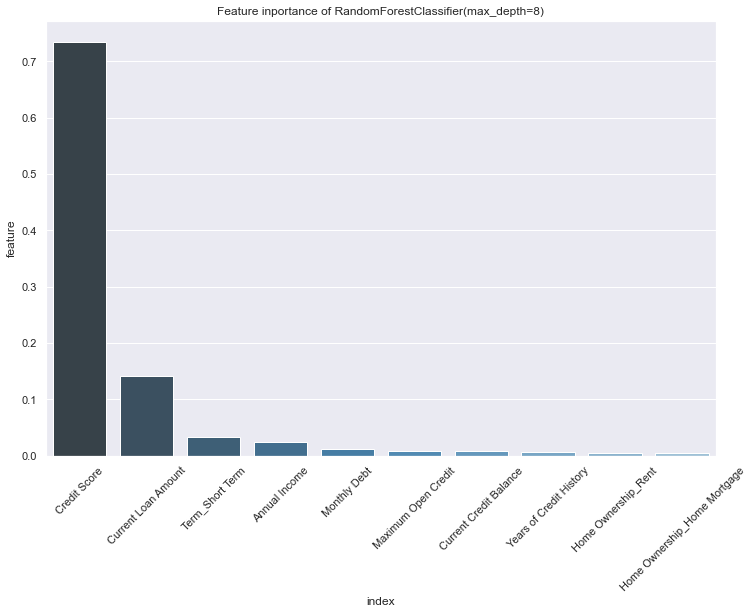

In [159]:
build_feature_importance(rf, x_train, y_train)

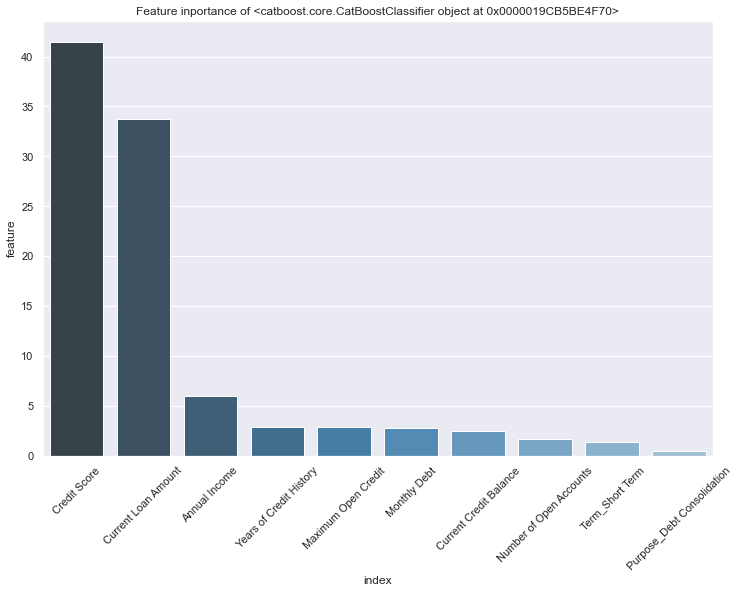

In [160]:
build_feature_importance(cb, x_train, y_train)